In [25]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim

NetworkX - Utilizada para criar e manipular grafos.  Aqui, será usada para representar as cidades como nós e as rotas como arestas, além de calcular soluções como o problema do Caixeiro Viajante.
Osmnx - Esta biblioteca facilita a obtenção de dados geoespaciais de OpenStreetMap e a criação de grafos baseados nesses dados. Será usada para gerar o grafo com as cidades e calcular distâncias.
Matplotlib - Biblioteca para visualização de dados em gráficos. Será usada para desenhar o grafo com as rotas e cidades
Folium - Usada para criar mapas interativos com base em folhetos. Aqui, criaremos um mapa interativo com as rotas calculadas.
Geopy - Um geocodificador que converte endereços em coordenadas geográficas. Utilizado aqui para obter a localização das cidades em coordenadas

# Criação do grafo

In [26]:
# Lista de cidades com campus da UTFPR
cidades=[
    "Apucarana, Paraná, Brazil",
    "Campo Mourão, Paraná, Brazil",
    "Cornélio Procópio, Paraná, Brazil",
    "Curitiba, Paraná, Brazil",
    "Dois Vizinhos, Paraná, Brazil",
    "Francisco Beltrão, Paraná, Brazil",
    "Guarapuava, Paraná, Brazil",
    "Londrina, Paraná, Brazil",
    "Medianeira, Paraná, Brazil",
    "Pato Branco, Paraná, Brazil",
    "Ponta Grossa, Paraná, Brazil",
    "Santa Helena, Paraná, Brazil",
    "Toledo, Paraná, Brazil",
]

# Criar um grafo vazio
G = nx.Graph()

# Adicionar cada cidade ao grafo
for cidade in cidades:
    # Pegando a coordenada da cidade
    localizacao = ox.geocoder.geocode(cidade)
    G.add_node(cidade, pos=localizacao)#ps contém as coordenadas da cidade

# Conectar todas as cidades (Completo)
for i, cidade1 in enumerate(cidades):
    for cidade2 in cidades[i+1:]:
        G.add_edge(cidade1, cidade2, weight=ox.distance.great_circle_vec(*G.nodes[cidade1]['pos'], *G.nodes[cidade2]['pos']))


C:\Users\jpedr\AppData\Local\Temp\ipykernel_13280\4056628655.py:30: FutureWarning: The `great_circle_vec` function has been renamed `great_circle`. Calling `great_circle_vec` will raise an error starting in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G.add_edge(cidade1, cidade2, weight=ox.distance.great_circle_vec(*G.nodes[cidade1]['pos'], *G.nodes[cidade2]['pos']))


# plotando o grafo

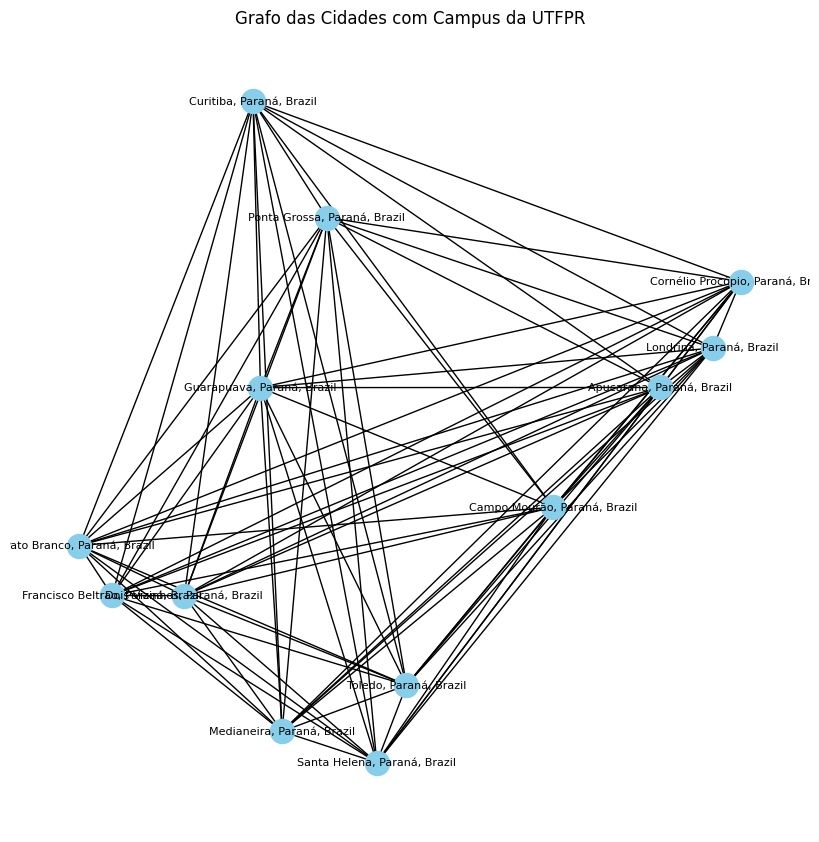

In [27]:
# Plotar o grafo
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=300, font_size=8, node_color='skyblue')
plt.title("Grafo das Cidades com Campus da UTFPR")
plt.show()

# mapa desse grafo

In [28]:

# Inicializando o mapa centrado no Paraná
centro_mapa = [-24.7, -53.1]
mapa = folium.Map(location=centro_mapa, zoom_start=7)

# Geolocalizador para obter as coordenadas das cidades (caso precise de coordenadas adicionais)
geolocator = Nominatim(user_agent="mapa_interativo")

# Adicionando marcadores para cada cidade do grafo
for city, (lat, lon) in pos.items():
    folium.Marker(
        [lat, lon],
        popup=f"<b>{city}</b><br><a href='https://www.openstreetmap.org/?mlat={lat}&mlon={lon}' target='_blank'>Ver no Mapa</a>",
        tooltip=city
    ).add_to(mapa)

# Salvar o mapa interativo como um arquivo HTML
#mapa.save("mapa_interativo.html") #salva o mapa em um arquivo html
mapa

# Problema do Caixeiro Viajante (TSP)

O Problema do Caixeiro Viajante (Traveling Salesman Problem - TSP) é um problema clássico de otimização em teoria dos grafos e ciência da computação. Ele pode ser descrito da seguinte forma:

## Descrição

Um caixeiro viajante deve visitar uma série de cidades e retornar à cidade inicial, de forma a minimizar o custo total da viagem. O custo pode ser a distância, tempo, ou qualquer outra métrica relevante entre as cidades.

### Problema Formal

- **Entrada**: Um conjunto de cidades e a matriz de custos ou distâncias entre todas as pares de cidades.
- **Saída**: A rota que passa por cada cidade exatamente uma vez e retorna à cidade inicial, com o custo total mínimo.

### Objetivo

Encontrar a rota mais curta (ou de menor custo) que permite ao caixeiro viajante visitar cada cidade exatamente uma vez e retornar ao ponto de partida.

### Aplicações: O TSP tem aplicações em logística, planejamento de rotas, e design de circuitos eletrônicos, entre outros.

### NetworkX

A biblioteca NetworkX, popular para análise de grafos em Python, oferece uma solução prática para o Problema do Caixeiro Viajante. A função `networkx.approximation.traveling_salesman_problem` pode ser usada para encontrar uma solução aproximada para o TSP. 

#### Como Funciona:

1. **Modelo do Grafo**: A função usa um grafo com pesos que representam as distâncias ou custos entre as cidades.
2. **Algoritmo**: A função aplica o algoritmo de busca de vizinho mais próximo (nearest neighbor) ou outros métodos heurísticos para encontrar uma solução que é uma aproximação da rota ótima.
3. **Resultado**: A função retorna a rota aproximada e o custo total dessa rota.

In [29]:
# Resolvendo o problema do Caixeiro Viajante
caminho_tsp = nx.approximation.traveling_salesman_problem(G, cycle=True, weight='weight')

In [30]:
# Criar um novo grafo apenas com as arestas do caminho TSP
for i in range(len(caminho_tsp) - 1):
    u, v = caminho_tsp[i], caminho_tsp[i+1]
    distancia_km = G[u][v]['weight'] / 1000  # Convertendo de metros para quilômetros
    G_tsp.add_edge(u, v, weight=distancia_km)


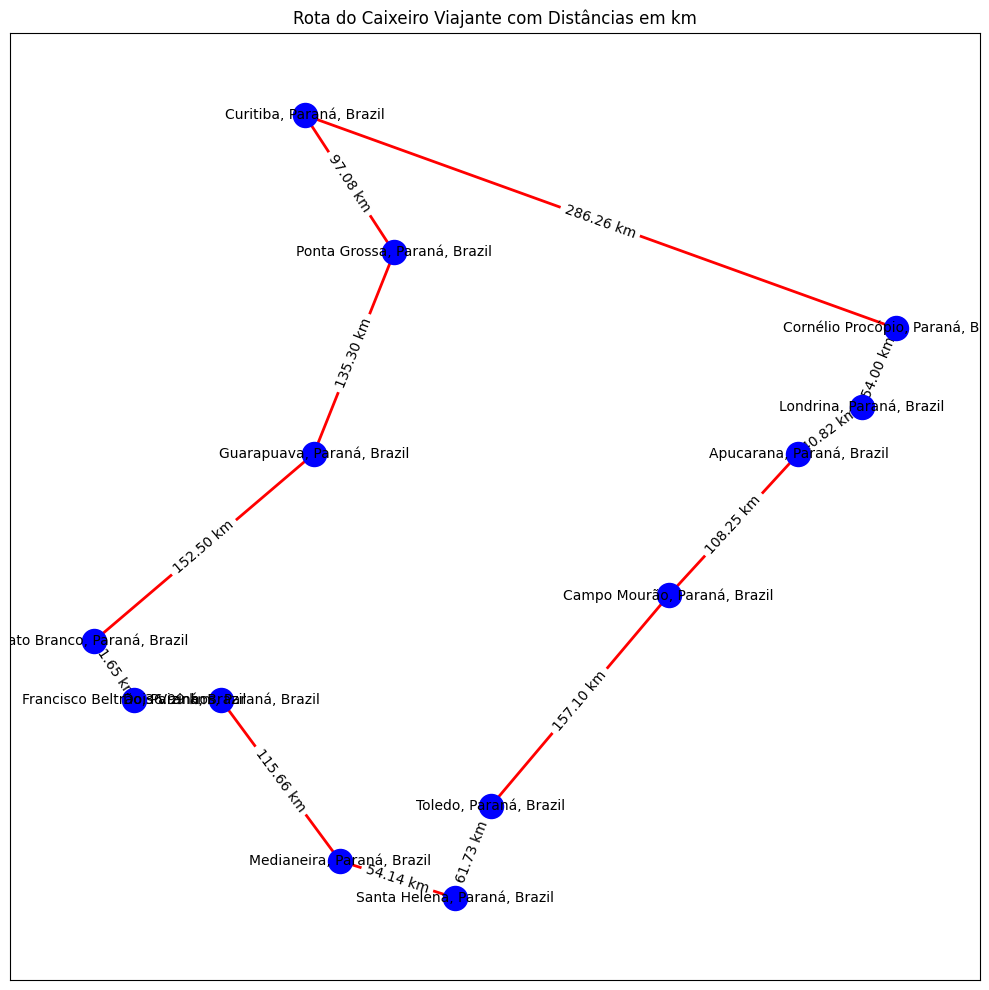

In [31]:
# Obter posições para o layout
pos = nx.get_node_attributes(G, 'pos')

# Plotar o grafo TSP com as cores personalizadas
plt.figure(figsize=(10, 10))  # Aumentando o tamanho da figura para melhor leitura

# Desenhar os nós (cidades) em azul
nx.draw_networkx_nodes(G_tsp, pos, node_color='blue', node_size=300)

# Desenhar as arestas percorridas em vermelho
nx.draw_networkx_edges(G_tsp, pos, edge_color='red', width=2)

# Desenhar os rótulos (nomes das cidades) em preto
nx.draw_networkx_labels(G_tsp, pos, font_color='black', font_size=10)

# Formatar as distâncias com duas casas decimais
edge_labels = {edge: f"{dist:.2f} km" for edge, dist in nx.get_edge_attributes(G_tsp, 'weight').items()}

# Adicionar os pesos (distâncias) nas arestas
nx.draw_networkx_edge_labels(G_tsp, pos, edge_labels=edge_labels, font_color='black')

# Título do gráfico
plt.title("Rota do Caixeiro Viajante com Distâncias em km")

# Ajustar o layout para centralizar e melhorar a leitura
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [32]:
#Exibir a ordem de percurso e distância total
distancia_total = sum(nx.path_weight(G_tsp, [caminho_tsp[i], caminho_tsp[i+1]], weight='weight') for i in range(len(caminho_tsp)-1))

# Exibindo a ordem de percurso e a distância total
ordem_percurso = ""
for i in range(len(caminho_tsp) - 1):
    cidade1 = caminho_tsp[i]
    cidade2 = caminho_tsp[i + 1]
    distancia = G_tsp[cidade1][cidade2]['weight']
    ordem_percurso += f"{cidade1} -- {distancia:.2f} km --> {cidade2}\n"

ordem_percurso += f"Distância Total: {distancia_total:.2f} km"
print(ordem_percurso)

Apucarana, Paraná, Brazil -- 108.25 km --> Campo Mourão, Paraná, Brazil
Campo Mourão, Paraná, Brazil -- 157.10 km --> Toledo, Paraná, Brazil
Toledo, Paraná, Brazil -- 61.73 km --> Santa Helena, Paraná, Brazil
Santa Helena, Paraná, Brazil -- 54.14 km --> Medianeira, Paraná, Brazil
Medianeira, Paraná, Brazil -- 115.66 km --> Dois Vizinhos, Paraná, Brazil
Dois Vizinhos, Paraná, Brazil -- 36.99 km --> Francisco Beltrão, Paraná, Brazil
Francisco Beltrão, Paraná, Brazil -- 41.65 km --> Pato Branco, Paraná, Brazil
Pato Branco, Paraná, Brazil -- 152.50 km --> Guarapuava, Paraná, Brazil
Guarapuava, Paraná, Brazil -- 135.30 km --> Ponta Grossa, Paraná, Brazil
Ponta Grossa, Paraná, Brazil -- 97.08 km --> Curitiba, Paraná, Brazil
Curitiba, Paraná, Brazil -- 286.26 km --> Cornélio Procópio, Paraná, Brazil
Cornélio Procópio, Paraná, Brazil -- 54.00 km --> Londrina, Paraná, Brazil
Londrina, Paraná, Brazil -- 40.82 km --> Apucarana, Paraná, Brazil
Distância Total: 1341.48 km


In [33]:

# Inicializar um novo mapa centrado no Paraná
centro_mapa = [-24.7, -53.1]
mapa_tsp = folium.Map(location=centro_mapa, zoom_start=7)

# Adicionar marcadores e a rota do Caixeiro Viajante no mapa
caminho_tsp_coords = [pos[city] for city in caminho_tsp]  # Coordenadas da rota do TSP

# Adicionar os marcadores das cidades visitadas
for i, (lat, lon) in enumerate(caminho_tsp_coords):
    folium.Marker(
        [lat, lon],
        popup=f"<b>{caminho_tsp[i]}</b><br><a href='https://www.openstreetmap.org/?mlat={lat}&mlon={lon}' target='_blank'>Ver no Mapa</a>",
        tooltip=caminho_tsp[i]
    ).add_to(mapa_tsp)

# Adicionar a rota do Caixeiro Viajante ao mapa
folium.PolyLine(caminho_tsp_coords, color="red", weight=2.5, opacity=1).add_to(mapa_tsp)

# Salvar o mapa interativo da rota do TSP como um arquivo HTML
#mapa_tsp.save("mapa_interativo_tsp.html") #salva no html
mapa_tsp #mostra o mapa